In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense, LeakyReLU

from keras.preprocessing.image import img_to_array, load_img
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [11]:
allData = pd.read_csv('../data/data.csv')
fields = ['filename', 'human']
data = allData[fields]
data.head()

,filename,human
0,01-20190707053407-06.jpg,0
1,01-20190707104301-05.jpg,1
2,01-20190707142157-05.jpg,1
3,01-20190707160533-02.jpg,1
4,01-20190713144837-02.jpg,1


In [12]:
basePath = '../data/rawData'

channels = 3
nb_classes = 1
target_height=180
target_width=320

In [15]:
dataset = np.ndarray(shape=(len(data), target_height, target_width, channels), dtype=np.float32)
y_dataset = []
i=0

# Set of markers so I can create an lst
for index, row in data.iterrows():
    y_dataset.append(row.human)
    img = load_img(basePath + '/' + row.filename, target_size=(target_height, target_width))
    x = img_to_array(img)
    x = x / 255.0
    dataset[i] = x
    i += 1


In [39]:
x_train, x_val_test, y_train, y_val_test = train_test_split(dataset, y_dataset, test_size=0.4)

validation_length = int(len(x_val))
# Separate validation from test
x_val = x_val_test[:validation_length]
y_val = y_val_test[:validation_length]

x_test = x_val_test[validation_length:]
y_test = y_val_test[validation_length:]

x_train.shape

(331, 180, 320, 3)

In [17]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=x_train[1,:].shape))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 178, 318, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 89, 159, 32)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 87, 157, 64)       18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 43, 78, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 41, 76, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 38, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 18, 36, 128)       147584    
__________

In [19]:
batch_size=16
epochs=10

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_val,y_val))
model.save('current_full.h5')

Train on 441 samples, validate on 111 samples
Epoch 1/10
441/441 [==============================] - 19s 43ms/step - loss: 0.8924 - acc: 0.5125 - val_loss: 0.6808 - val_acc: 0.6396
Epoch 2/10
441/441 [==============================] - 18s 42ms/step - loss: 0.7715 - acc: 0.5760 - val_loss: 0.5968 - val_acc: 0.7387
Epoch 3/10
441/441 [==============================] - 75s 169ms/step - loss: 0.5591 - acc: 0.6961 - val_loss: 0.3049 - val_acc: 0.9189
Epoch 4/10
441/441 [==============================] - 165s 373ms/step - loss: 0.4539 - acc: 0.8141 - val_loss: 0.1897 - val_acc: 0.9279
Epoch 5/10
441/441 [==============================] - 159s 360ms/step - loss: 0.3121 - acc: 0.8685 - val_loss: 0.1773 - val_acc: 0.9550
Epoch 6/10
441/441 [==============================] - 159s 361ms/step - loss: 0.2611 - acc: 0.8866 - val_loss: 0.3838 - val_acc: 0.7928
Epoch 7/10
441/441 [==============================] - 171s 388ms/step - loss: 0.2292 - acc: 0.9229 - val_loss: 0.2060 - val_acc: 0.9279
Epoch 8

In [38]:
score = model.evaluate(x_val, y_val, verbose=1)
i = 0
for metric in model.metrics_names:
    print(metric + ": " + str(score[i]))
    i += 1

111/111 [==============================] - 1s 9ms/step
loss: 0.23362560154081466
acc: 0.9189189194558977


Predicted Chance of human: 0.0063012023
Validation: 0


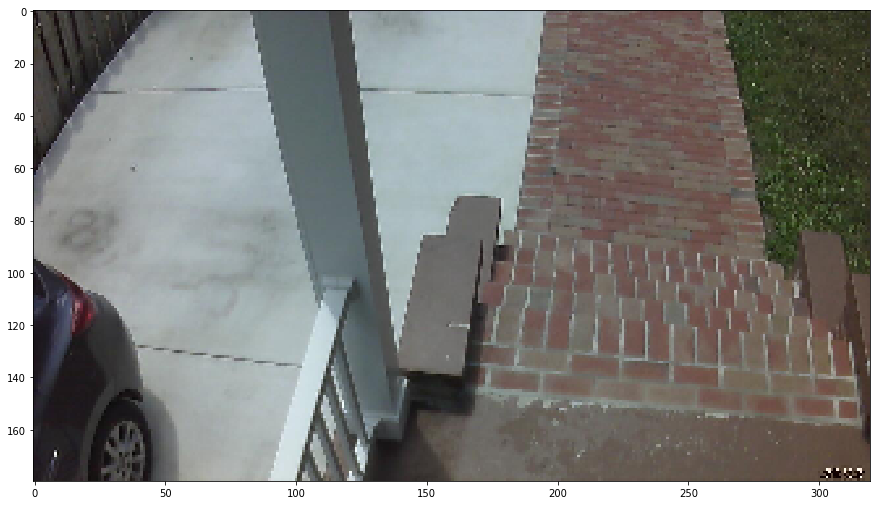

In [40]:
i = 20
results = model.predict(x_val[i:i+1])

print("Predicted Chance of human: " + str(results[0,0]))
print("Validation: " + str(y_val[i]))

plt.figure(figsize=(15,15))
plt.imshow(x_val[i])
